In [37]:
from sklearn.datasets import load_wine
import pandas as pd
import statsmodels.formula.api as sm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [39]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

Исключим регионы с индексом 2

In [40]:
df = df[df.target != 2]
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [41]:
df.target.value_counts()

target
1    71
0    59
Name: count, dtype: int64

Выявим самые коррелирующие с 'target' параметры

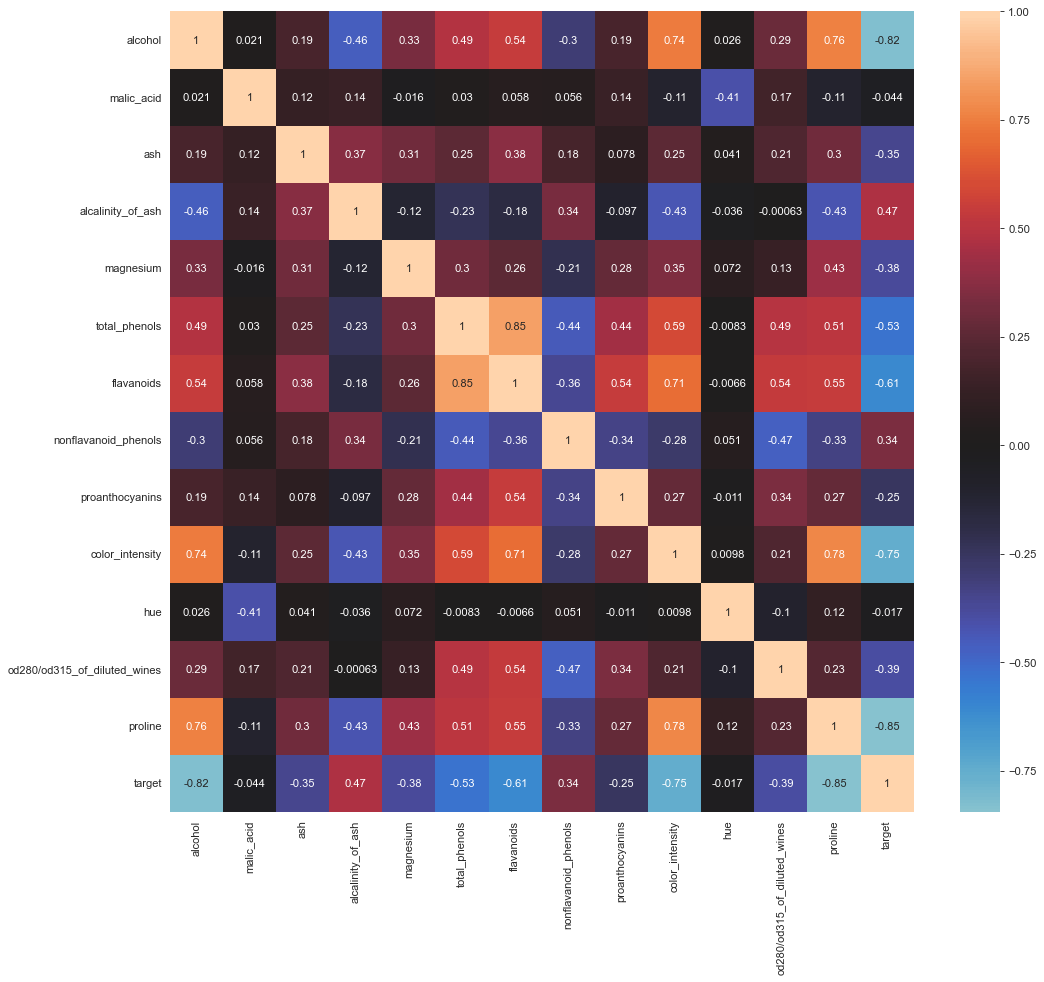

In [42]:
plt.figure(figsize=(15,13), dpi=80)
sns.heatmap(df.loc[:, 'alcohol':'target'].corr(), xticklabels=df.loc[:, 'alcohol':'target'].corr().columns, center=0, annot=True)
plt.show()

Это 'alcohol', 'color_intensity' и 'proline'

Построим логистическую регрессию по отобранным параметрам

In [43]:
features = ['alcohol', 'color_intensity', 'proline']
model = sm.logit('target ~ alcohol + color_intensity + proline', df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.039411
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  130
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                  0.9428
Time:                        14:22:09   Log-Likelihood:                -5.1235
converged:                       True   LL-Null:                       -89.554
Covariance Type:            nonrobust   LLR p-value:                 2.240e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         130.6996     77.570      1.685      0.092     -21.335     282.735
alcohol      

Вычислим метрики качества классификации

In [44]:
y_true = df.loc[:, 'target']
y_pred = results.predict(df.loc[:, features]).round()

In [45]:
print(confusion_matrix(y_true, y_pred))

[[58  1]
 [ 1 70]]


In [46]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.99      0.99      0.99        71

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130
